## Topic: Electro-Histogram Signal Analysis to detect whether the baby is preterm or non-preterm.

The tabular data set has been extracted from the electro-histogram signal. By this signal can detect whether the baby is preterm or non-preterm. 

From research in the university of science and research of Tehran, the tabular features have been extracted from 58 signals in the Biomedical Engineering search.

The dataset is original Binary classified with 58 data each data has been mined from the signal of electro histogram in 1000 seconds periods.

Based on the signal physician can detect whether the baby is preterm. In this research, we have analyzed 58 signals of electro histograms of a different mother. The dataset has been extracted from signal-processing technics.

Note: Dataset is less. However, code I did can be taken as a reference for future work on large dataset.

Keypoints:
1. Importing necessary libraries and dataset.
2. Data Preprocessing
3. Data Cleaning
4. Data Visualization
5. Exploratory Data Analysis
6. Modeling - Decision Tree, Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('preterm.csv')

In [3]:
df.head()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1


In [4]:
df.tail()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
53,321,2675,46107.09,0.499,0,0
54,398,2339,51122.31,0.469,0,0
55,321,2675,46108.18,0.498,0,0
56,398,2336,51224.37,0.459,0,0
57,323,2641,46102.17,0.439,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      58 non-null     int64  
 1   lenght of contraction  58 non-null     int64  
 2   STD                    58 non-null     float64
 3   Entropy                58 non-null     float64
 4   Contraction times      58 non-null     int64  
 5   Pre-term               58 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.8 KB


In [6]:
df.isnull().sum()

Count Contraction        0
lenght of contraction    0
STD                      0
Entropy                  0
Contraction times        0
Pre-term                 0
dtype: int64

In [7]:
df.describe()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2503.810345,26621.965517,48564.968190,0.879759,0.637931,0.327586
std,3788.639864,61527.769917,8952.845551,0.528180,0.809988,0.473432
min,222.000000,2308.000000,29205.840000,0.428000,0.000000,0.000000
25%,398.000000,2649.500000,42303.962500,0.490500,0.000000,0.000000
50%,495.000000,3371.500000,49307.490000,0.586000,0.000000,0.000000
75%,1988.750000,12093.750000,54374.865000,1.187500,1.000000,1.000000
max,12452.000000,228321.000000,63467.583000,2.067000,2.000000,1.000000


In [8]:
df.columns

Index(['Count Contraction', 'lenght of contraction', 'STD', 'Entropy',
       'Contraction times', 'Pre-term'],
      dtype='object')

In [9]:
df.shape

(58, 6)

In [10]:
df.duplicated().sum()

1

In [11]:
df = df.drop_duplicates()

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df['Contraction times'].unique()

array([2, 1, 0], dtype=int64)

In [14]:
df['Contraction times'].value_counts()

0    33
2    12
1    12
Name: Contraction times, dtype: int64

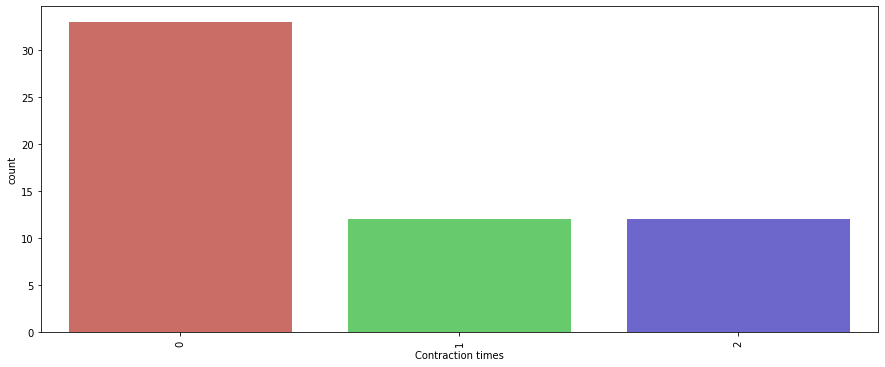

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Contraction times',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

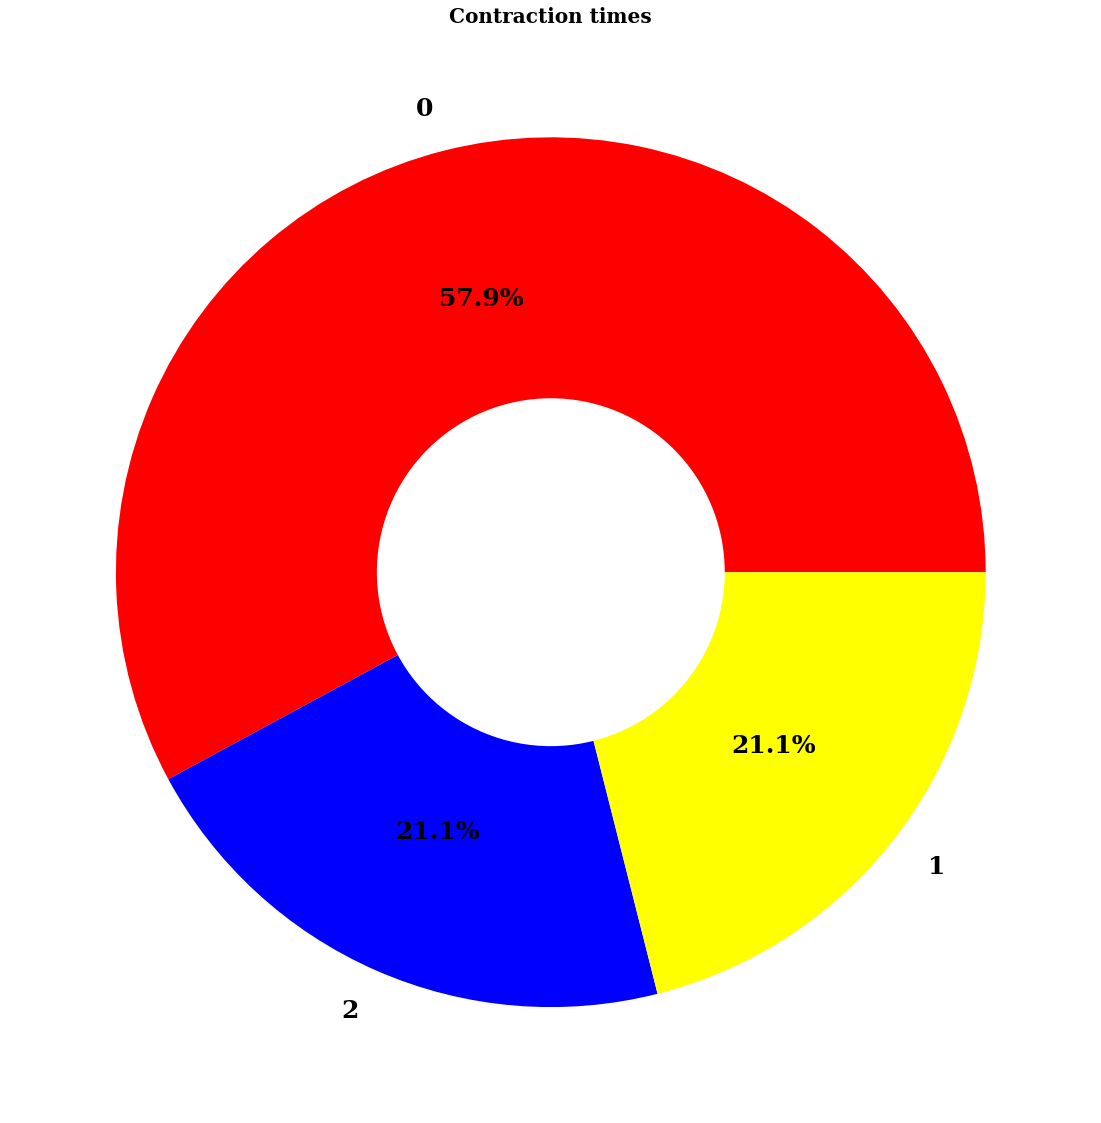

In [16]:
label_data = df['Contraction times'].value_counts()
explode = (0.0,0.0,0.0)
plt.figure(figsize=(30, 20))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors=['red','blue','yellow'],
                               pctdistance=0.65,
                               shadow=False,
                               labeldistance=1.1, 
                              startangle=0,
                              explode=explode,
                              autopct='%1.1f%%',
                              radius=1, 
                              counterclock=True, 
                              textprops={'fontsize': 25,
                                        'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' })
plt.setp(pcts, color = 'black')

hfont = {'fontname':'serif','weight':'bold'}
plt.title('Contraction times',size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()                                                                                                                                                                                                                                          

In [17]:
df['Pre-term'].unique()

array([1, 0], dtype=int64)

In [18]:
df['Pre-term'].value_counts()

0    39
1    18
Name: Pre-term, dtype: int64

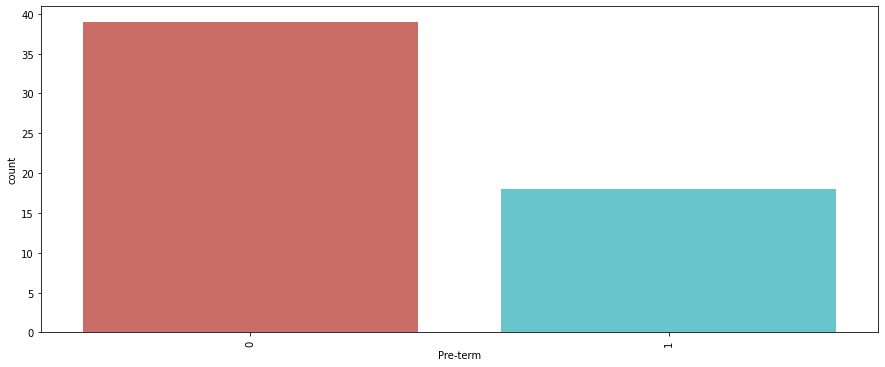

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Pre-term',
              palette= 'hls')
plt.xticks(rotation=90)
plt.show()

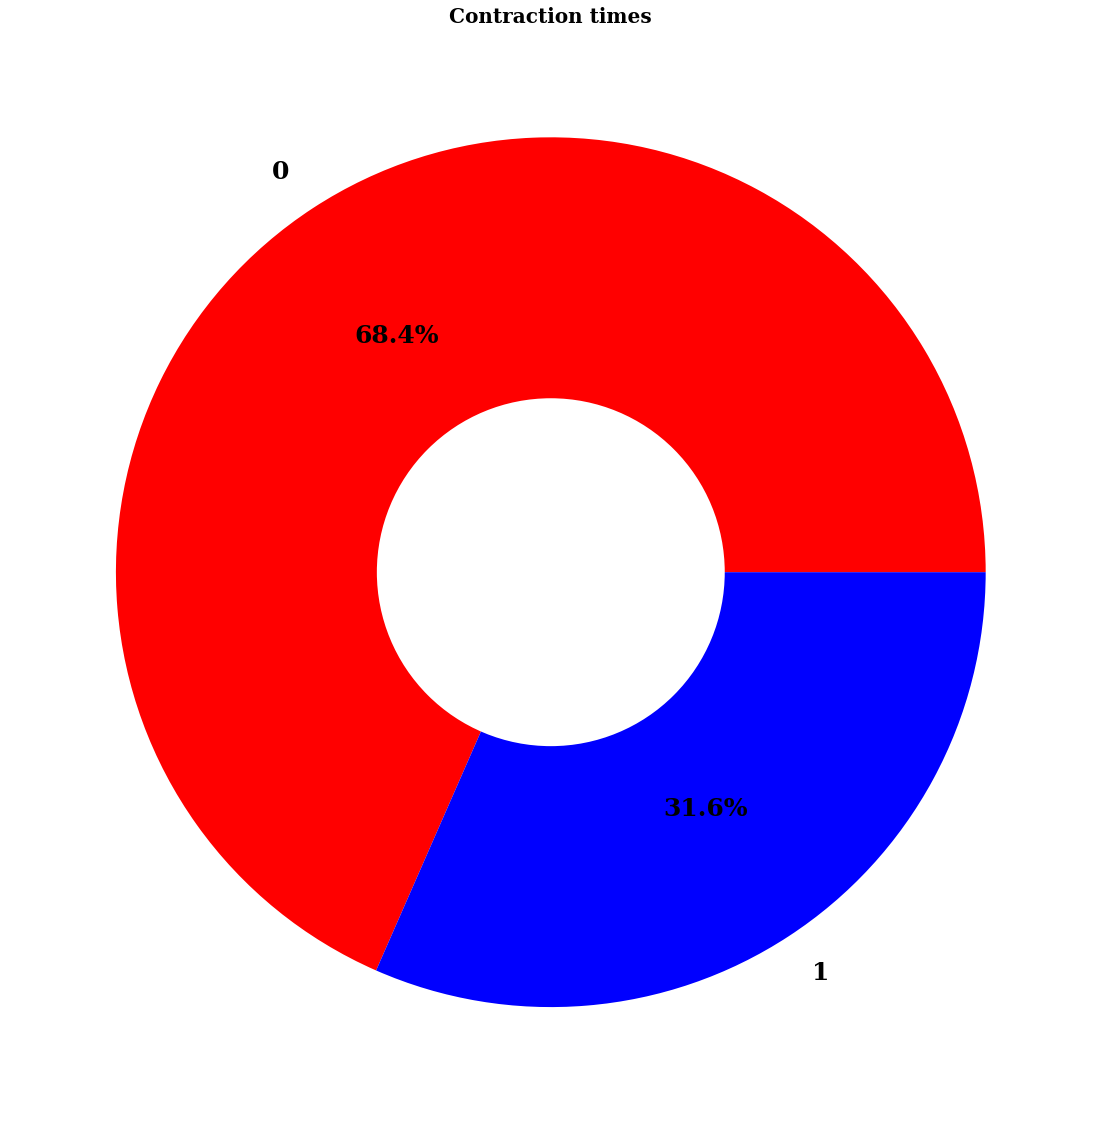

In [20]:
label_data = df['Pre-term'].value_counts()
explode = (0.0,0.0,)
plt.figure(figsize=(30, 20))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors=['red','blue'],
                               pctdistance=0.65,
                               shadow=False,
                               labeldistance=1.1, 
                              startangle=0,
                              explode=explode,
                              autopct='%1.1f%%',
                              radius=1, 
                              counterclock=True, 
                              textprops={'fontsize': 25,
                                        'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' })
plt.setp(pcts, color = 'black')

hfont = {'fontname':'serif','weight':'bold'}
plt.title('Contraction times',size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

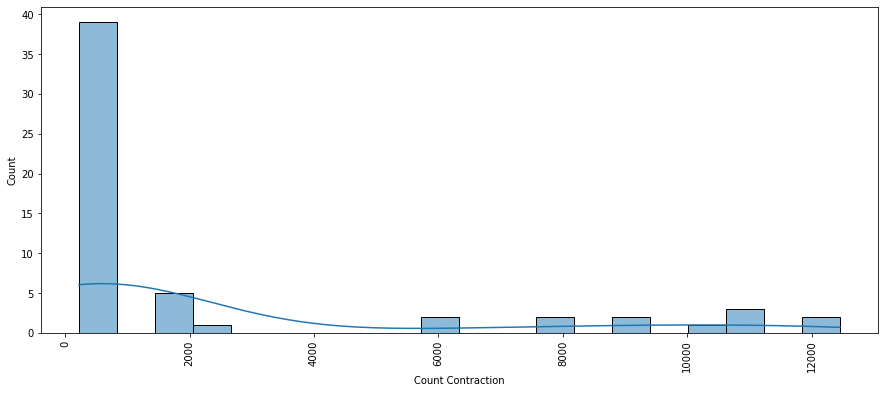

In [21]:
plt.figure(figsize=(15,6))
sns.histplot(df['Count Contraction'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

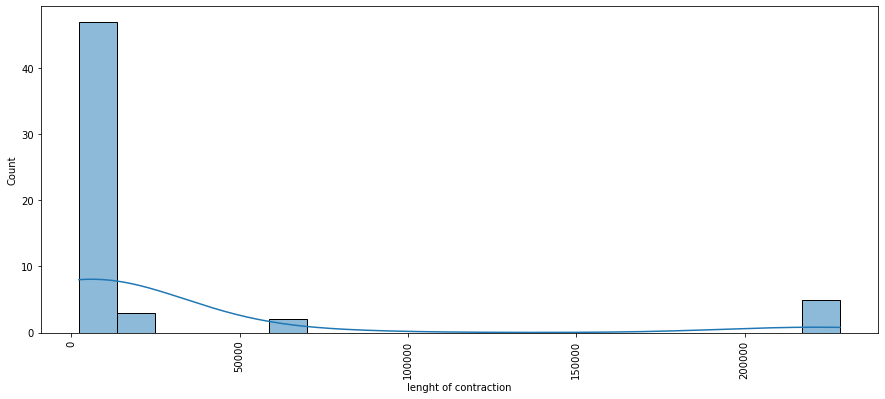

In [22]:
plt.figure(figsize=(15,6))
sns.histplot(df['lenght of contraction'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

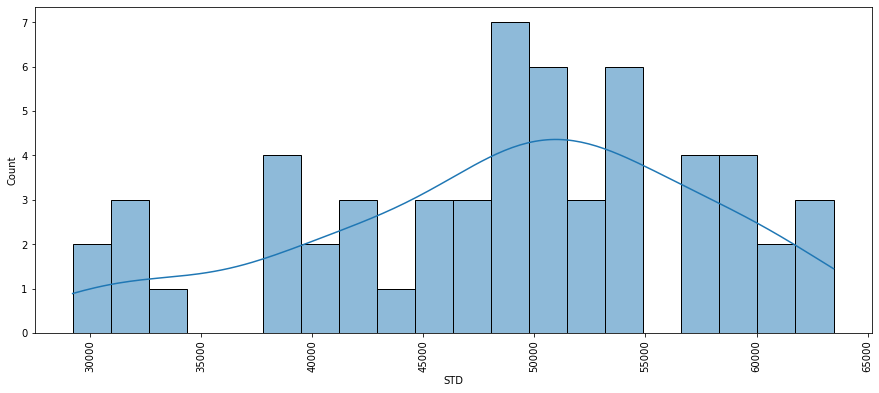

In [23]:
plt.figure(figsize=(15,6))
sns.histplot(df['STD'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

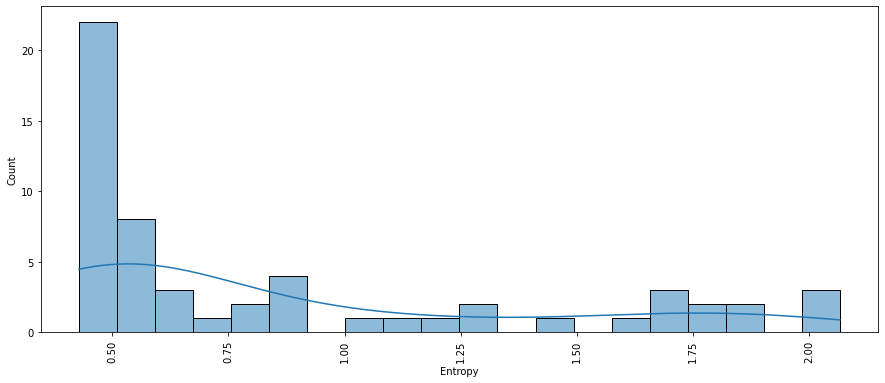

In [24]:
plt.figure(figsize=(15,6))
sns.histplot(df['Entropy'],bins=20,kde=True, palette='husl')
plt.xticks(rotation = 90)
plt.show()

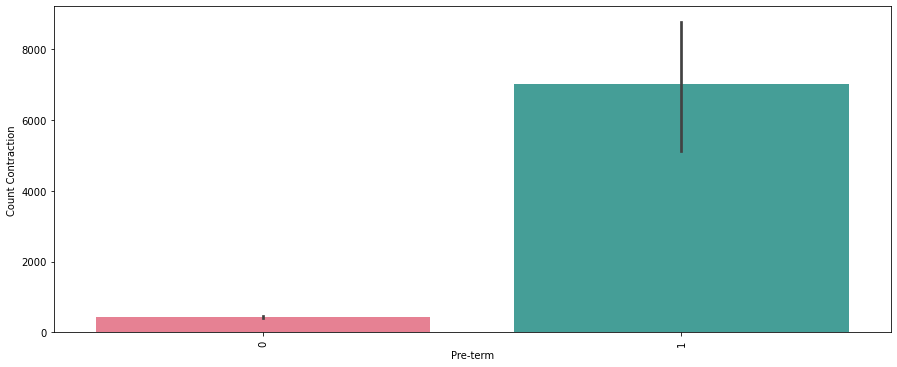

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['Count Contraction'],x =df['Pre-term'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

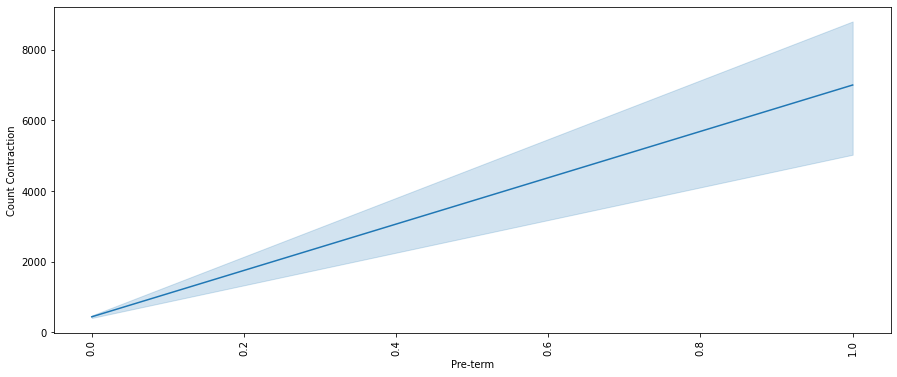

In [26]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Count Contraction'],x =df['Pre-term'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

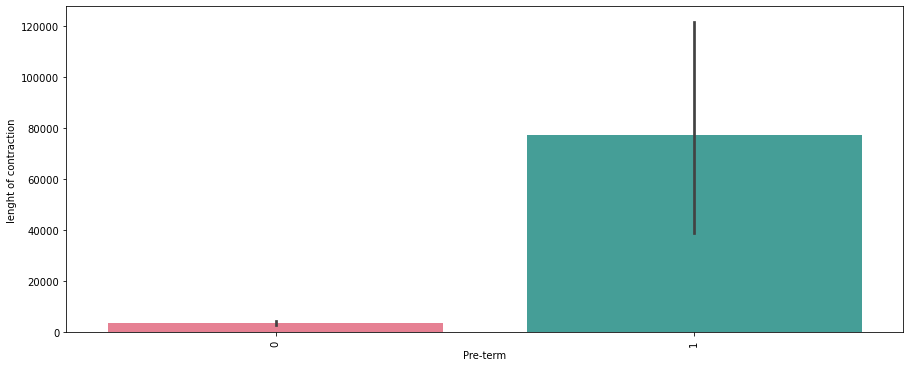

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['lenght of contraction'],x =df['Pre-term'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

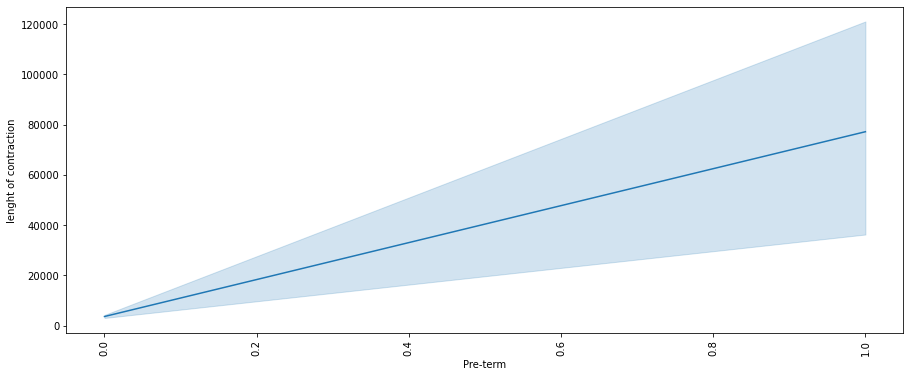

In [28]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['lenght of contraction'],x =df['Pre-term'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

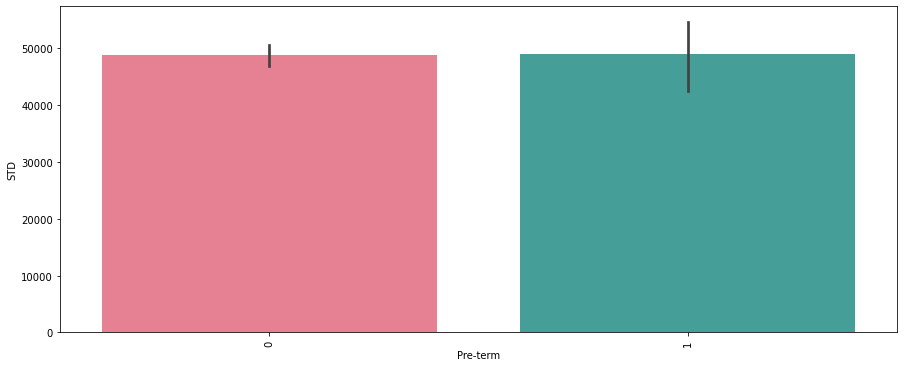

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['STD'],x =df['Pre-term'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

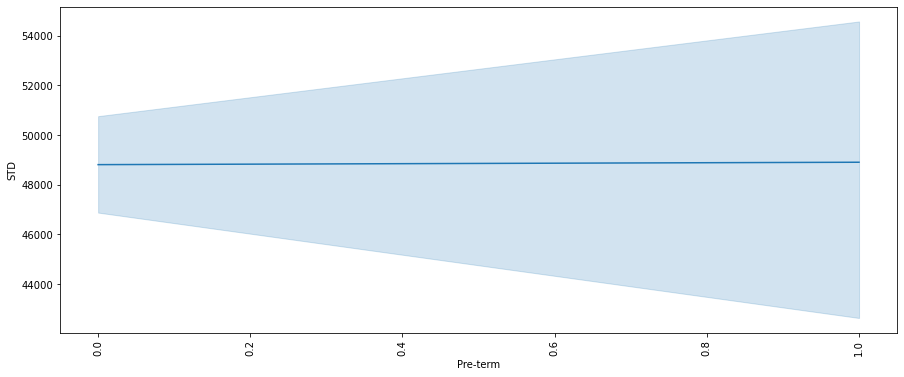

In [30]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['STD'],x =df['Pre-term'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

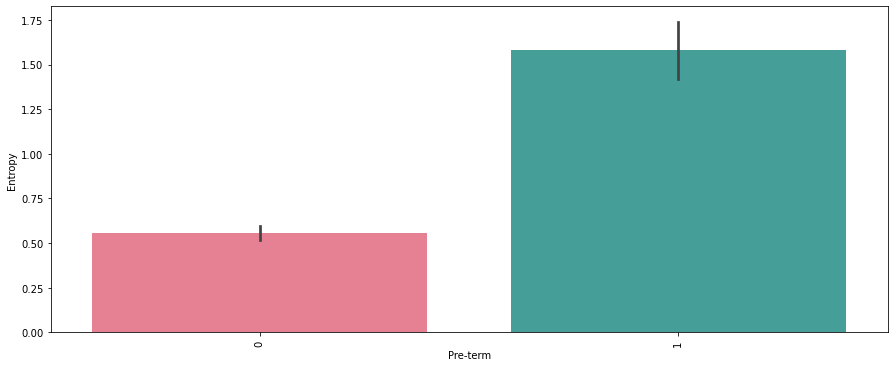

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['Entropy'],x =df['Pre-term'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

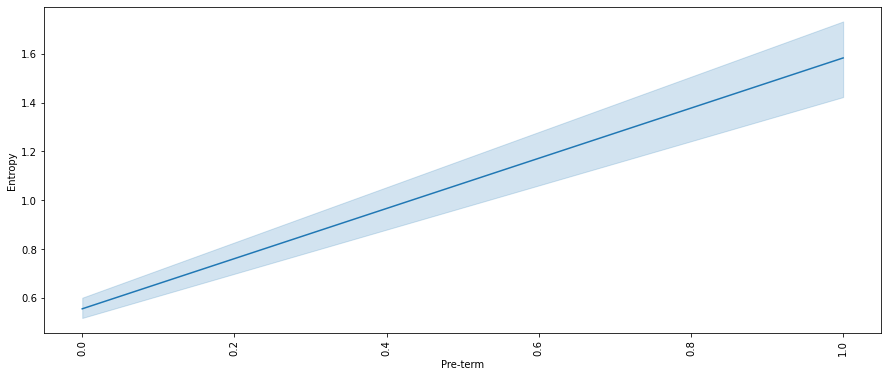

In [32]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Entropy'],x =df['Pre-term'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

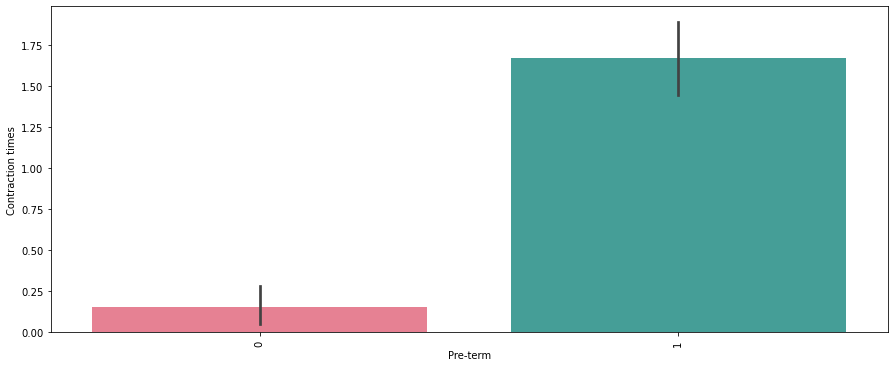

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(y= df['Contraction times'],x =df['Pre-term'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

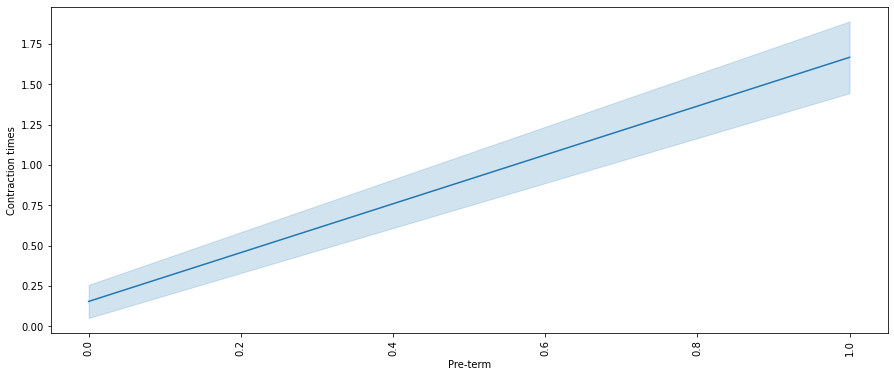

In [34]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Contraction times'],x =df['Pre-term'],data=df,  palette='husl')
plt.xticks(rotation = 90)
plt.show()

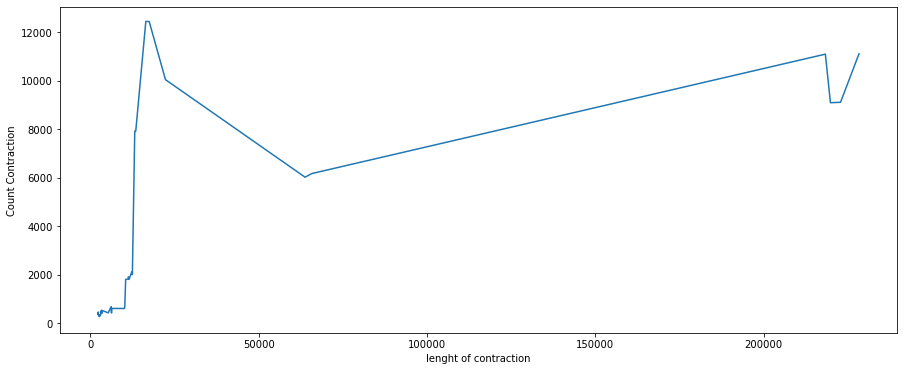

In [35]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Count Contraction'],x =df['lenght of contraction'],data=df,  palette='husl')
plt.show()

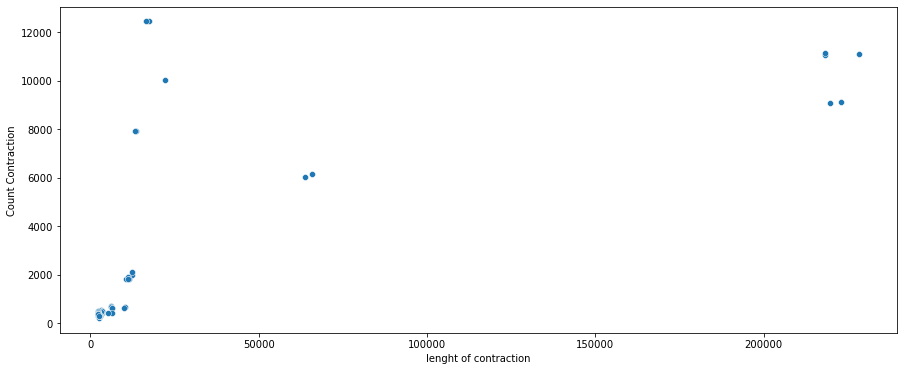

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(y= df['Count Contraction'],x =df['lenght of contraction'],data=df,  palette='husl')
plt.show()

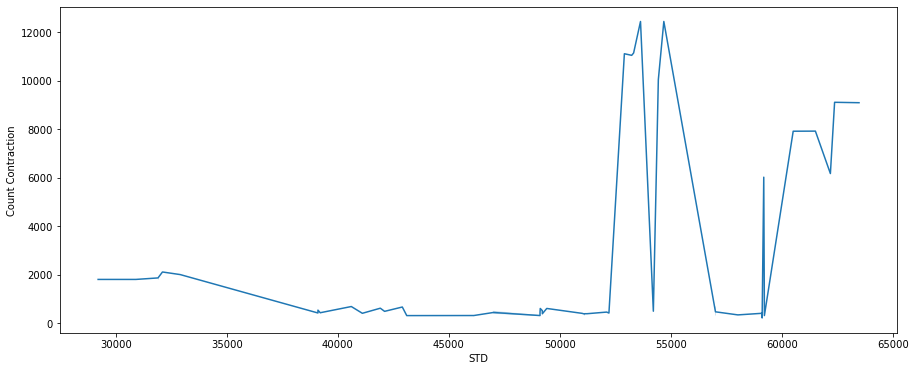

In [37]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Count Contraction'],x =df['STD'],data=df,  palette='husl')
plt.show()

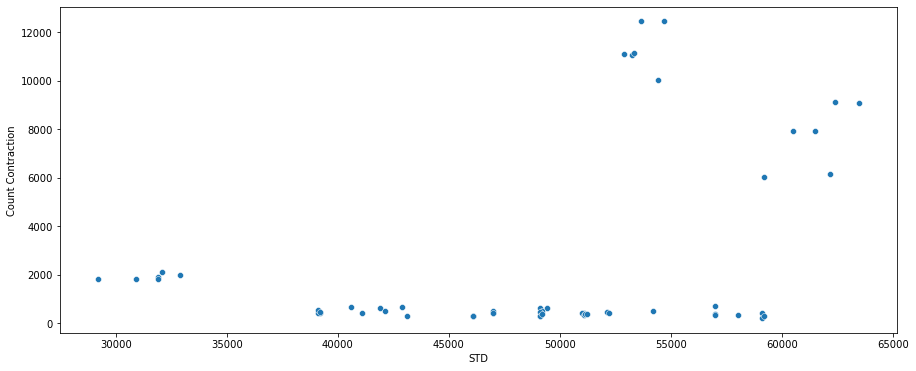

In [38]:
plt.figure(figsize=(15,6))
sns.scatterplot(y= df['Count Contraction'],x =df['STD'],data=df,  palette='husl')
plt.show()

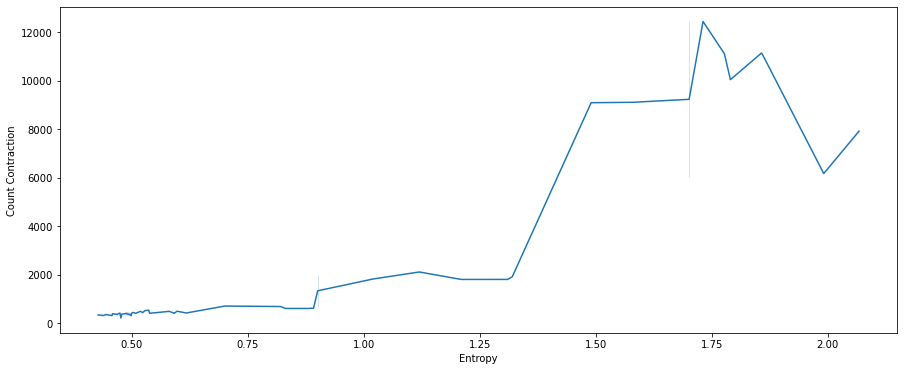

In [39]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Count Contraction'],x =df['Entropy'],data=df,  palette='husl')
plt.show()

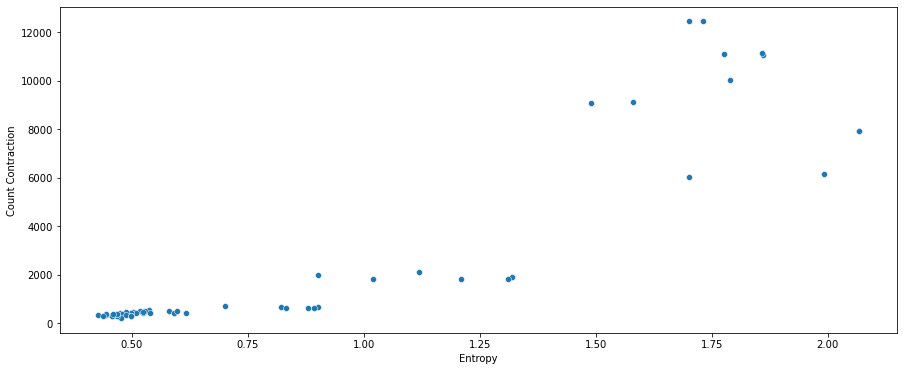

In [40]:
plt.figure(figsize=(15,6))
sns.scatterplot(y= df['Count Contraction'],x =df['Entropy'],data=df,  palette='husl')
plt.show()

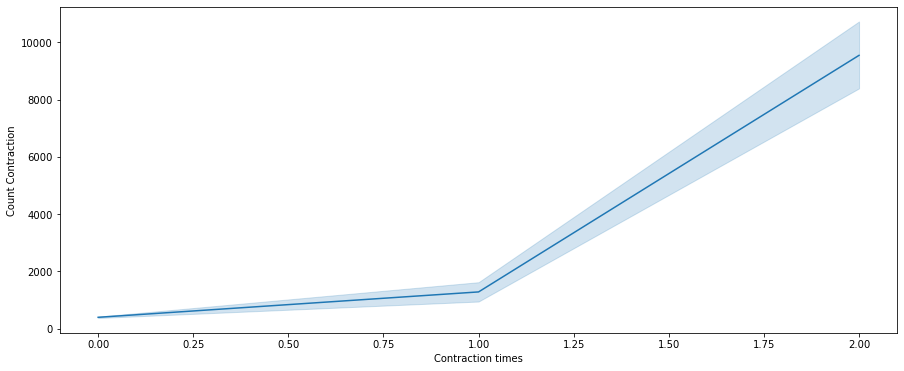

In [41]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['Count Contraction'],x =df['Contraction times'],data=df,  palette='husl')
plt.show()

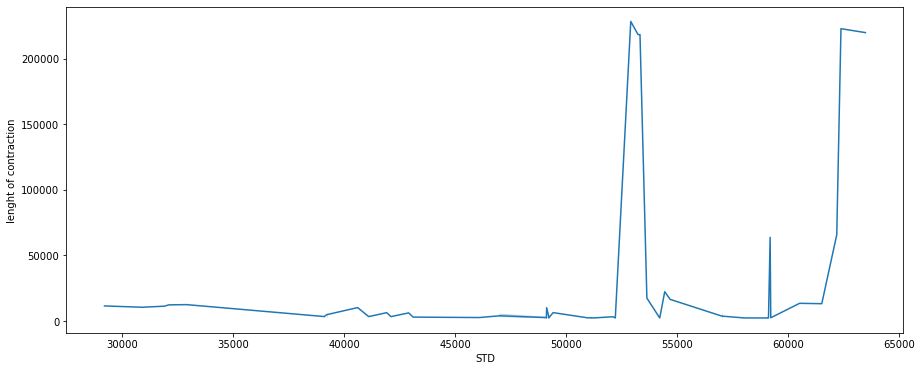

In [42]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['lenght of contraction'],x =df['STD'],data=df,  palette='husl')
plt.show()

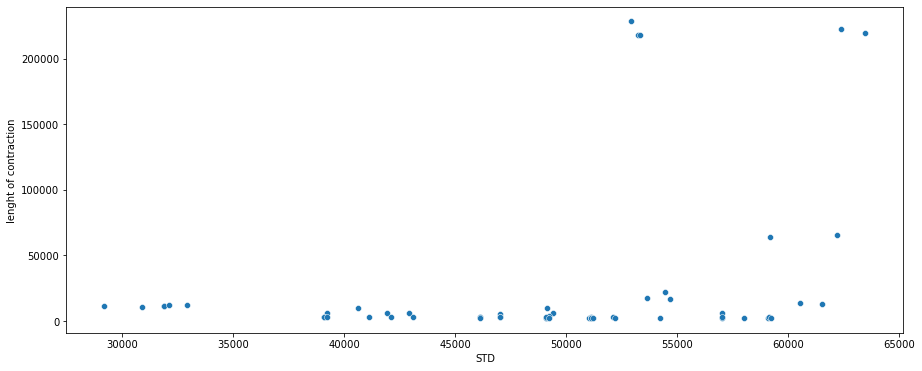

In [43]:
plt.figure(figsize=(15,6))
sns.scatterplot(y= df['lenght of contraction'],x =df['STD'],data=df,  palette='husl')
plt.show()

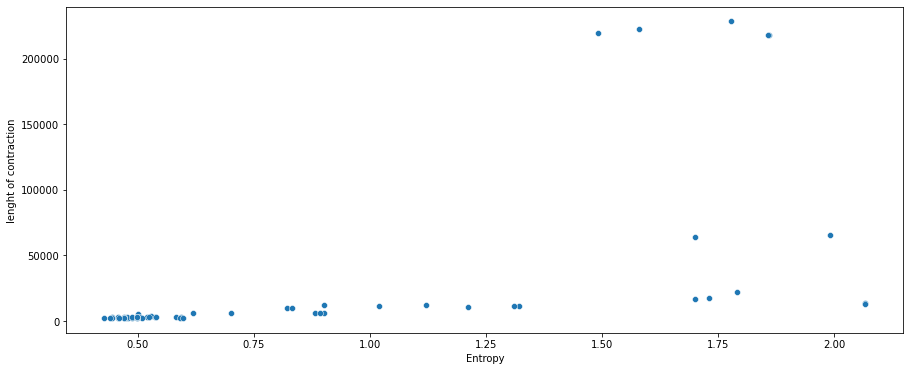

In [44]:
plt.figure(figsize=(15,6))
sns.scatterplot(y= df['lenght of contraction'],x =df['Entropy'],data=df,  palette='husl')
plt.show()

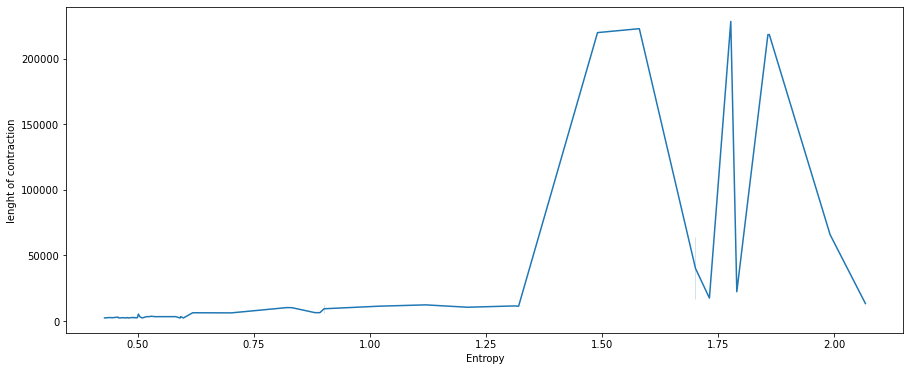

In [45]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['lenght of contraction'],x =df['Entropy'],data=df,  palette='husl')
plt.show()

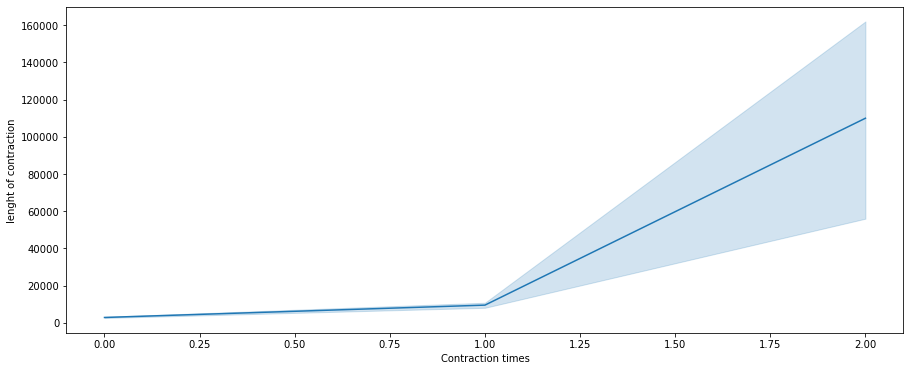

In [46]:
plt.figure(figsize=(15,6))
sns.lineplot(y= df['lenght of contraction'],x =df['Contraction times'],data=df,  palette='husl')
plt.show()

In [47]:
df_corr = df.corr()

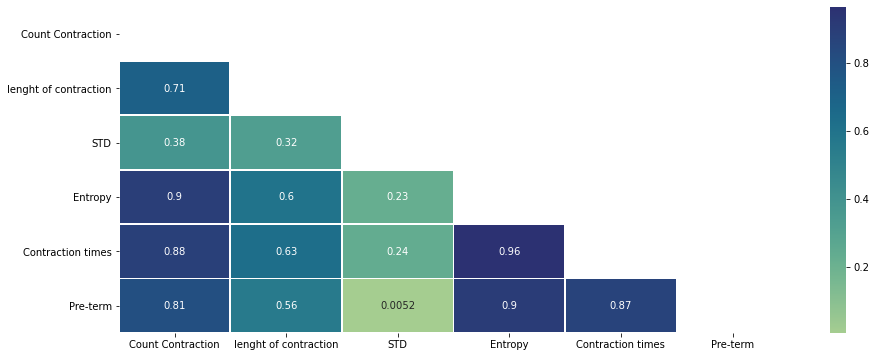

In [48]:
plt.figure(figsize=(15,6))
matrix = np.triu(df_corr)
sns.heatmap(df_corr,annot=True,linewidth=.8,mask=matrix, cmap='crest')
plt.show()

In [49]:
X = df.drop('Pre-term', axis = 1)
y = df['Pre-term']

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
X = pd.DataFrame(StandardScaler().fit_transform(X))

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [56]:
print('Confusion matrix : \n',cm)

Confusion matrix : 
 [[9 0]
 [0 9]]


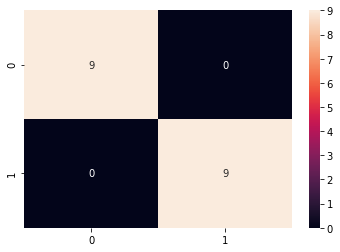

In [57]:
sns.heatmap(cm,annot = True)
plt.show()

In [58]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [59]:
print("\n Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test,y_pred)))


 Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=0):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18




In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators=10,random_state=42)

In [62]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [63]:
y_pred = rfc.predict(X_test)

In [64]:
cm= confusion_matrix(y_test,y_pred)

In [65]:
cm

array([[9, 0],
       [0, 9]], dtype=int64)

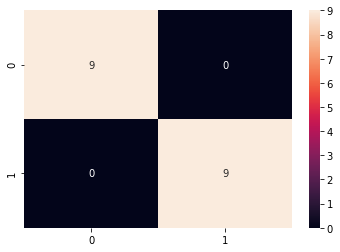

In [66]:
sns.heatmap(cm,annot=True)
plt.show()

In [67]:
print("\n Classification report for classifier %s:\n%s\n" % (rfc, metrics.classification_report(y_test,y_pred)))


 Classification report for classifier RandomForestClassifier(n_estimators=10, random_state=42):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18




In [71]:
model = RandomForestClassifier()

In [72]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
import pickle
filename = 'savedmodel.sav'
pickle.dump(model,open(filename,'wb'))

In [76]:
loaded_model = pickle.load(open(filename,'rb'))